In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


In [2]:
download_df = pd.read_csv("D:\\Data Science Roadmap and Practice\\Machine Learning Projects\\Playstore Apps Download Prediciton\\notebook\\Data\\downloads.csv")

In [3]:
download_df

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"
...,...,...,...,...,...,...,...,...,...,...,...
16511,ps_id-5583,Health And Fitness,4.30,13724,Varies with device,Free,Everyone,Sep 21 2018,Varies with device,Varies with device,"1,000,000+"
16512,ps_id-15485,Beauty,4.73,70,7.9M,Free,Everyone,May 07 2020,0.2.5,4.1 and up,"10,000+"
16513,ps_id-36065,Health And Fitness,4.60,5420,21M,Free,Everyone,Jul 10 2019,2.48.3,4.1 and up,"500,000+"
16514,ps_id-12625,Productivity,4.60,1488289,Varies with device,Free,Everyone,Sep 07 2019,Varies with device,Varies with device,"100,000,000+"


In [4]:
download_df.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [5]:
download_df.tail()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
16511,ps_id-5583,Health And Fitness,4.30,13724,Varies with device,Free,Everyone,Sep 21 2018,Varies with device,Varies with device,"1,000,000+"
16512,ps_id-15485,Beauty,4.73,70,7.9M,Free,Everyone,May 07 2020,0.2.5,4.1 and up,"10,000+"
16513,ps_id-36065,Health And Fitness,4.60,5420,21M,Free,Everyone,Jul 10 2019,2.48.3,4.1 and up,"500,000+"
16514,ps_id-12625,Productivity,4.60,1488289,Varies with device,Free,Everyone,Sep 07 2019,Varies with device,Varies with device,"100,000,000+"
16515,ps_id-4549,Game Role Playing,4.45,21201,16M,745.0542,Teen,Sep 20 2019,2.5.17.0,3.0 and up,"100,000+"


In the Below Code I have changed the records of the feature 'Price' cause we had two type reords there one is string and other is int so to make it completely integer I have convetred 'Free' to integer 0. In the downloads feature I could see that we have an unwanted symbol '+' this symbol is valid by user point of view but for us it would cause problems so by REGEXP I have removed that as well but the use have to understand it that if he predicted the downloads value for any of the category and app that value will 'value+' for e.g. '1000+'.

In [6]:
download_df['Price'] = download_df['Price'].replace('Free',0)

In [7]:
download_df

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,0,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,0,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,0,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,0,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"
...,...,...,...,...,...,...,...,...,...,...,...
16511,ps_id-5583,Health And Fitness,4.30,13724,Varies with device,0,Everyone,Sep 21 2018,Varies with device,Varies with device,"1,000,000+"
16512,ps_id-15485,Beauty,4.73,70,7.9M,0,Everyone,May 07 2020,0.2.5,4.1 and up,"10,000+"
16513,ps_id-36065,Health And Fitness,4.60,5420,21M,0,Everyone,Jul 10 2019,2.48.3,4.1 and up,"500,000+"
16514,ps_id-12625,Productivity,4.60,1488289,Varies with device,0,Everyone,Sep 07 2019,Varies with device,Varies with device,"100,000,000+"


In [8]:
download_df.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,0,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,0,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,0,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,0,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [9]:
download_df_new = download_df.replace({
    'Downloads' : '[+,]',
    'Offered_By' : '[_-]'
},"",regex=True)
download_df_new


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000
...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000
16512,psid15485,Beauty,4.73,70,7.9M,0,Everyone,May 07 2020,0.2.5,4.1 and up,10000
16513,psid36065,Health And Fitness,4.60,5420,21M,0,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000
16514,psid12625,Productivity,4.60,1488289,Varies with device,0,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000


In [10]:
download_df_new.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000


In [11]:
download_df_new.to_csv("downloads_new.csv",index=False)

In [12]:
download_df_new

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000
...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000
16512,psid15485,Beauty,4.73,70,7.9M,0,Everyone,May 07 2020,0.2.5,4.1 and up,10000
16513,psid36065,Health And Fitness,4.60,5420,21M,0,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000
16514,psid12625,Productivity,4.60,1488289,Varies with device,0,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000


In [13]:
download_df_new.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
Downloads              0
dtype: int64

In [14]:
download_df_new.duplicated().sum()

88

Here we could see there are 88 duplicated values in the whole dataset but before removing the duplicates we have to see each column where we are getting duplicates and based on that we will remove it cause it can happen there are duplicates in offered_id or category or content_rating we cannot remove those because it would change the granularity of the dataset.


In [15]:
list_0f_column = ['Offered_By','Category','Rating','Reviews','Size','Price','Content_Rating','Last_Updated_On','Release_Version','OS_Version_Required','Downloads']
download_df_new = download_df_new.drop_duplicates(subset=list_0f_column, keep='first')


In [16]:
download_df_new

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000
...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000
16512,psid15485,Beauty,4.73,70,7.9M,0,Everyone,May 07 2020,0.2.5,4.1 and up,10000
16513,psid36065,Health And Fitness,4.60,5420,21M,0,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000
16514,psid12625,Productivity,4.60,1488289,Varies with device,0,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000


In [17]:
download_df_new.duplicated().sum()

0

In [18]:
download_df_new.shape

(16428, 11)

In [19]:
download_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16428 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16428 non-null  object 
 1   Category             16428 non-null  object 
 2   Rating               16428 non-null  float64
 3   Reviews              16428 non-null  int64  
 4   Size                 16428 non-null  object 
 5   Price                16428 non-null  object 
 6   Content_Rating       16428 non-null  object 
 7   Last_Updated_On      16428 non-null  object 
 8   Release_Version      16428 non-null  object 
 9   OS_Version_Required  16428 non-null  object 
 10  Downloads            16428 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.5+ MB


As we can see there are two or three columns whose data tye is not correct according to our file so we will covert the dataype of those columns.

In [20]:
download_df_new['Price'] = pd.to_numeric(download_df_new['Price'], errors='coerce')

In [21]:
download_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16428 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16428 non-null  object 
 1   Category             16428 non-null  object 
 2   Rating               16428 non-null  float64
 3   Reviews              16428 non-null  int64  
 4   Size                 16428 non-null  object 
 5   Price                16428 non-null  float64
 6   Content_Rating       16428 non-null  object 
 7   Last_Updated_On      16428 non-null  object 
 8   Release_Version      16428 non-null  object 
 9   OS_Version_Required  16428 non-null  object 
 10  Downloads            16428 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.5+ MB


In [22]:
download_df_new['Downloads'] = pd.to_numeric(download_df_new['Downloads'], errors='coerce')

In [23]:
download_df_new

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000
...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000


In [24]:
download_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16428 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16428 non-null  object 
 1   Category             16428 non-null  object 
 2   Rating               16428 non-null  float64
 3   Reviews              16428 non-null  int64  
 4   Size                 16428 non-null  object 
 5   Price                16428 non-null  float64
 6   Content_Rating       16428 non-null  object 
 7   Last_Updated_On      16428 non-null  object 
 8   Release_Version      16428 non-null  object 
 9   OS_Version_Required  16428 non-null  object 
 10  Downloads            16428 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


In [25]:
print(download_df_new.describe())

             Rating       Reviews         Price     Downloads
count  16428.000000  1.642800e+04  16428.000000  1.642800e+04
mean       4.259321  1.867844e+05     30.731609  7.018494e+06
std        0.499951  1.884586e+06    574.946128  6.494736e+07
min        1.000000  1.000000e+00      0.000000  1.000000e+01
25%        4.090000  1.460000e+02      0.000000  1.000000e+04
50%        4.360000  1.861000e+03      0.000000  1.000000e+05
75%        4.580000  2.208125e+04      0.000000  1.000000e+06
max        5.000000  8.576643e+07  29831.254200  5.000000e+09


In [26]:
print('Unique values in Category  column are:',download_df_new['Category'].unique())
print('Unique values in Content_Rating  column are:',download_df_new['Content_Rating'].unique())
print('Unique values in OS_Version_Required  column are:',download_df_new['OS_Version_Required'].unique())


Unique values in Category  column are: ['Finance' 'Music And Audio' 'Game Casual' 'Business' 'Medical'
 'Books And Reference' 'Tools' 'Game' 'Travel And Local' 'Family'
 'Game Simulation' 'Lifestyle' 'Comics' 'Education' 'Entertainment'
 'Game Action' 'Social' 'Sports' 'Photography' 'Game Word' 'Game Trivia'
 'Communication' 'News And Magazines' 'Game Board' 'House And Home'
 'Personalization' 'Game Puzzle' 'Productivity' 'Health And Fitness'
 'Shopping' 'Art And Design' 'Weather' 'Maps And Navigation' 'Dating'
 'Game Arcade' 'Game Role Playing' 'Game Educational' 'Video Players'
 'Game Strategy' 'Food And Drink' 'Game Sports' 'Auto And Vehicles'
 'Events' 'Game Adventure' 'Parenting' 'Libraries And Demo' 'Game Racing'
 'Game Card' 'Game Music' 'Game Casino' 'Beauty']
Unique values in Content_Rating  column are: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Unique values in OS_Version_Required  column are: ['Varies with device' '4.1 and up' '5.0 and up' '4

In [27]:
download_df_new['Downloads_Log'] = np.log10(download_df_new['Downloads'])

In [28]:
download_df_new

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000,5.00000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000,3.69897
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000,4.00000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000,7.00000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000,3.69897
...,...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000,6.00000
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000,4.00000
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000,5.69897
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000,8.00000


In [29]:
download_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16428 entries, 0 to 16515
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16428 non-null  object 
 1   Category             16428 non-null  object 
 2   Rating               16428 non-null  float64
 3   Reviews              16428 non-null  int64  
 4   Size                 16428 non-null  object 
 5   Price                16428 non-null  float64
 6   Content_Rating       16428 non-null  object 
 7   Last_Updated_On      16428 non-null  object 
 8   Release_Version      16428 non-null  object 
 9   OS_Version_Required  16428 non-null  object 
 10  Downloads            16428 non-null  int64  
 11  Downloads_Log        16428 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.6+ MB


In [30]:


numerical_feature = [feature for feature in download_df_new.columns if download_df_new[feature].dtype !='O']
categorical_feature = [feature for feature in download_df_new.columns if download_df_new[feature].dtype =='O']

print('we have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical features: {}'.format(len(categorical_feature),categorical_feature))

we have 5 numerical features: ['Rating', 'Reviews', 'Price', 'Downloads', 'Downloads_Log']
we have 7 categorical features: ['Offered_By', 'Category', 'Size', 'Content_Rating', 'Last_Updated_On', 'Release_Version', 'OS_Version_Required']


In [31]:
download_df_new

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000,5.00000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000,3.69897
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000,4.00000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000,7.00000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000,3.69897
...,...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000,6.00000
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000,4.00000
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000,5.69897
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000,8.00000


In [32]:
download_df_new[categorical_feature]

,Offered_By,Category,Size,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,psid24654,Finance,Varies with device,Everyone,May 05 2020,Varies with device,Varies with device
1,psid35329,Music And Audio,10M,Everyone,Mar 26 2020,3.9.18,4.1 and up
2,psid11044,Game Casual,27M,Everyone,May 01 2020,1.10.1,4.1 and up
3,psid36068,Business,Varies with device,Teen,May 02 2020,Varies with device,Varies with device
4,psid35831,Medical,Varies with device,Everyone,Nov 29 2018,Varies with device,Varies with device
...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,Varies with device,Everyone,Sep 21 2018,Varies with device,Varies with device
16512,psid15485,Beauty,7.9M,Everyone,May 07 2020,0.2.5,4.1 and up
16513,psid36065,Health And Fitness,21M,Everyone,Jul 10 2019,2.48.3,4.1 and up
16514,psid12625,Productivity,Varies with device,Everyone,Sep 07 2019,Varies with device,Varies with device


In [33]:
download_df_new[numerical_feature]

,Rating,Reviews,Price,Downloads,Downloads_Log
0,4.18,1481,0.0000,100000,5.00000
1,4.81,302,0.0000,5000,3.69897
2,4.27,374,0.0000,10000,4.00000
3,4.03,122058,0.0000,10000000,7.00000
4,4.60,358,297.5742,5000,3.69897
...,...,...,...,...,...
16511,4.30,13724,0.0000,1000000,6.00000
16512,4.73,70,0.0000,10000,4.00000
16513,4.60,5420,0.0000,500000,5.69897
16514,4.60,1488289,0.0000,100000000,8.00000


In [34]:
download_df_new[numerical_feature].corr()

,Rating,Reviews,Price,Downloads,Downloads_Log
Rating,1.000000,0.030849,-0.018994,0.017692,0.049559
Reviews,0.030849,1.000000,-0.005106,0.594985,0.209900
Price,-0.018994,-0.005106,1.000000,-0.005729,-0.050555
Downloads,0.017692,0.594985,-0.005729,1.000000,0.241254
Downloads_Log,0.049559,0.209900,-0.050555,0.241254,1.000000


<Axes: >

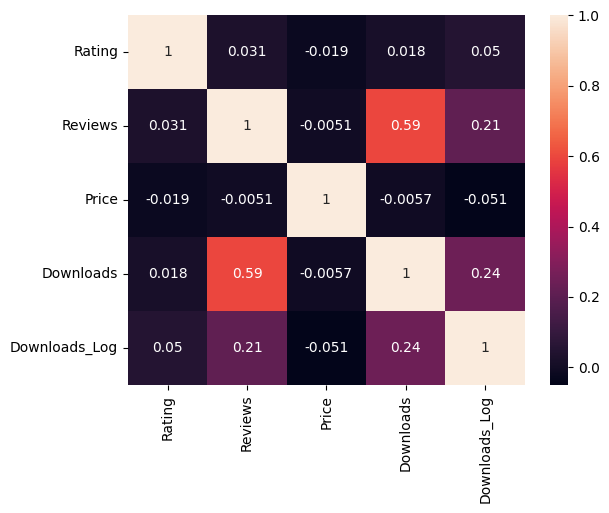

In [35]:
sns.heatmap(download_df_new[numerical_feature].corr(),annot=True)

<Figure size 800x600 with 0 Axes>

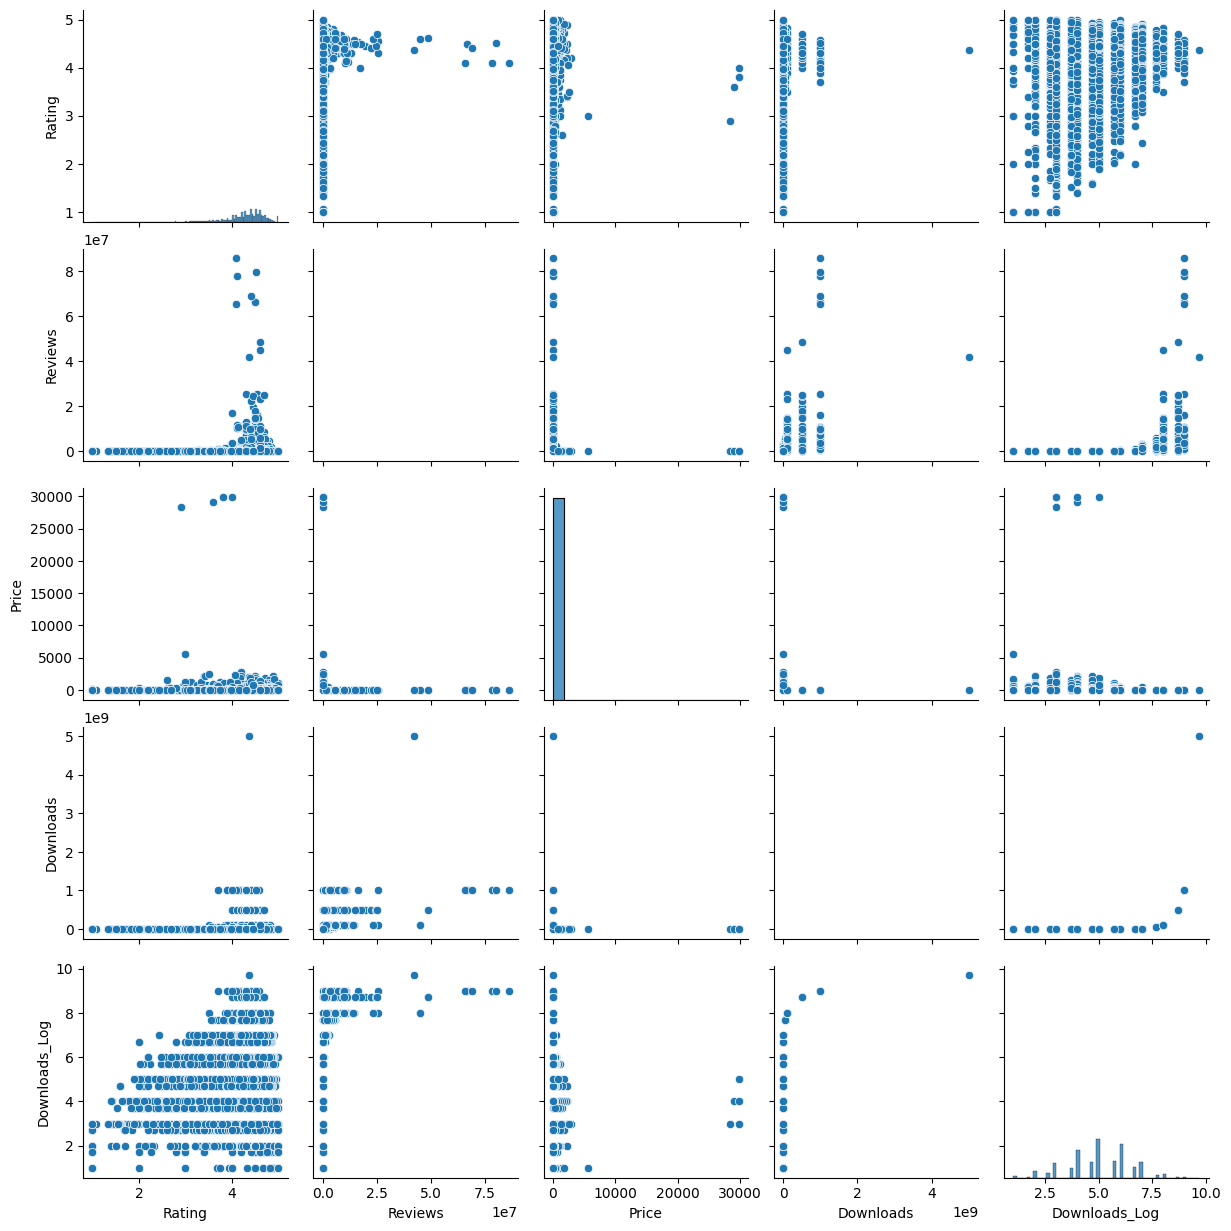

In [36]:
plt.figure(figsize=(8,6))
sns.pairplot(download_df_new[numerical_feature])
plt.show()

In the above plot we could see the relation between every numerical feature w.r.t each other it looks a litle clumsy but it is considerate to look like this as the data that we have is huge.


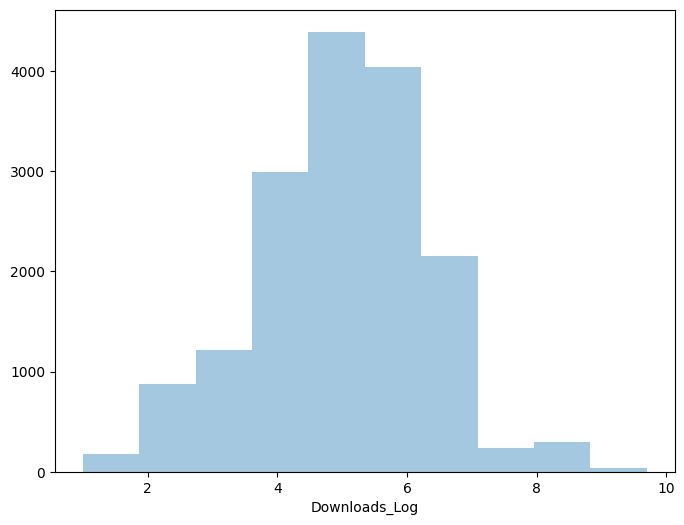

In [37]:
plt.figure(figsize=(8,6))
sns.distplot(download_df_new[numerical_feature]['Downloads_Log'], kde=False, bins=10)
plt.show()

In the above histogram w.r.t downloads we could see little outliers although it is normally distributed but still there are some outliers those could be eliminated using z score.


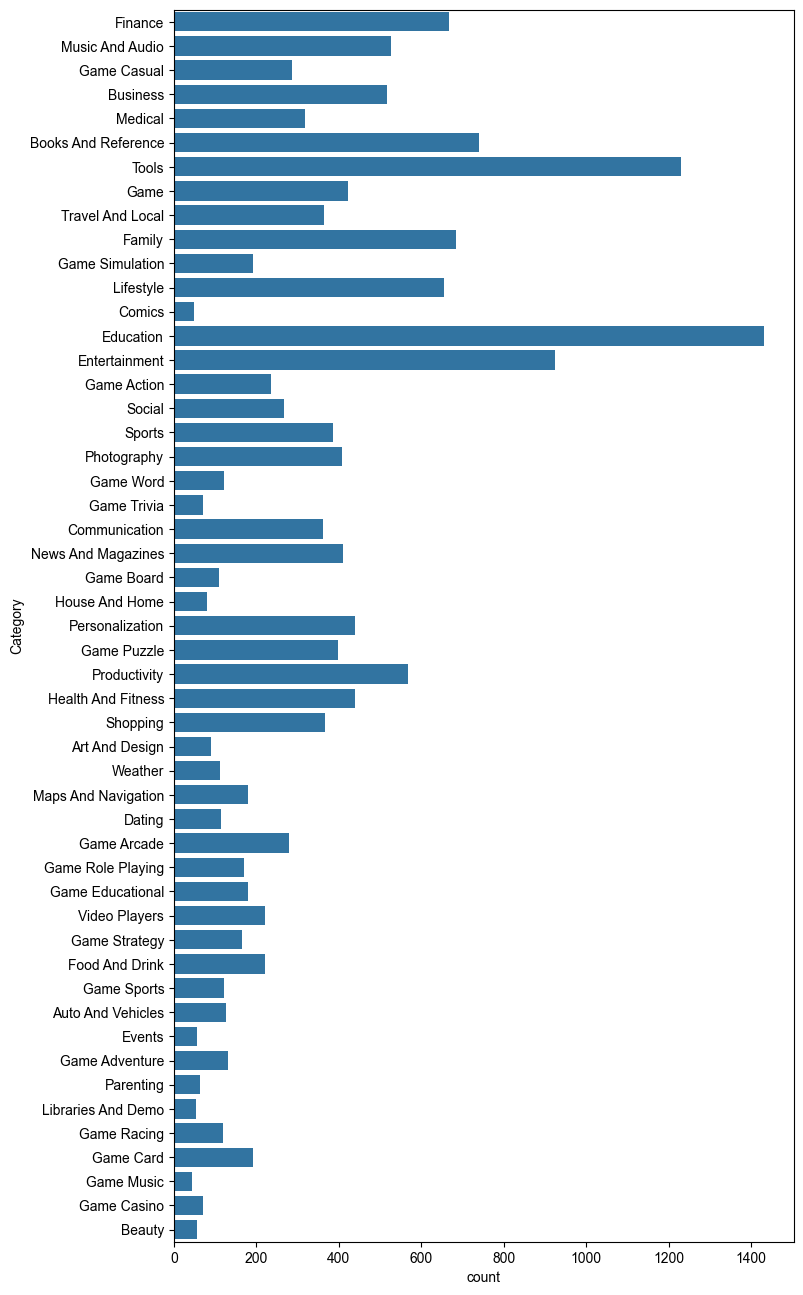

In [38]:
plt.figure(figsize=(8,16))
sns.countplot(y=download_df_new[categorical_feature]['Category'])
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show()

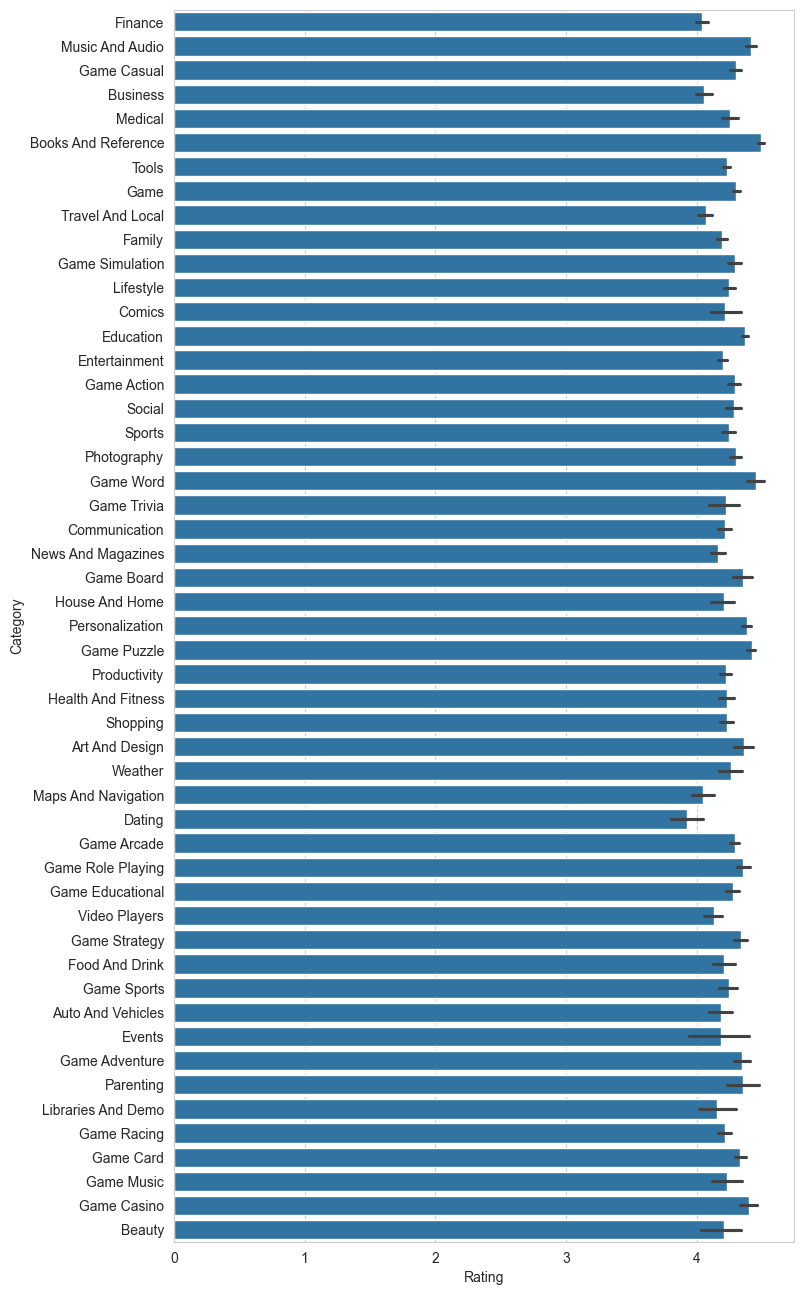

In [39]:
plt.figure(figsize=(8,16))
sns.barplot(y=download_df_new[categorical_feature]['Category'],x=download_df_new[numerical_feature]['Rating'])
sns.set_style("darkgrid", {'grid.linestyle': '--'})
plt.show()

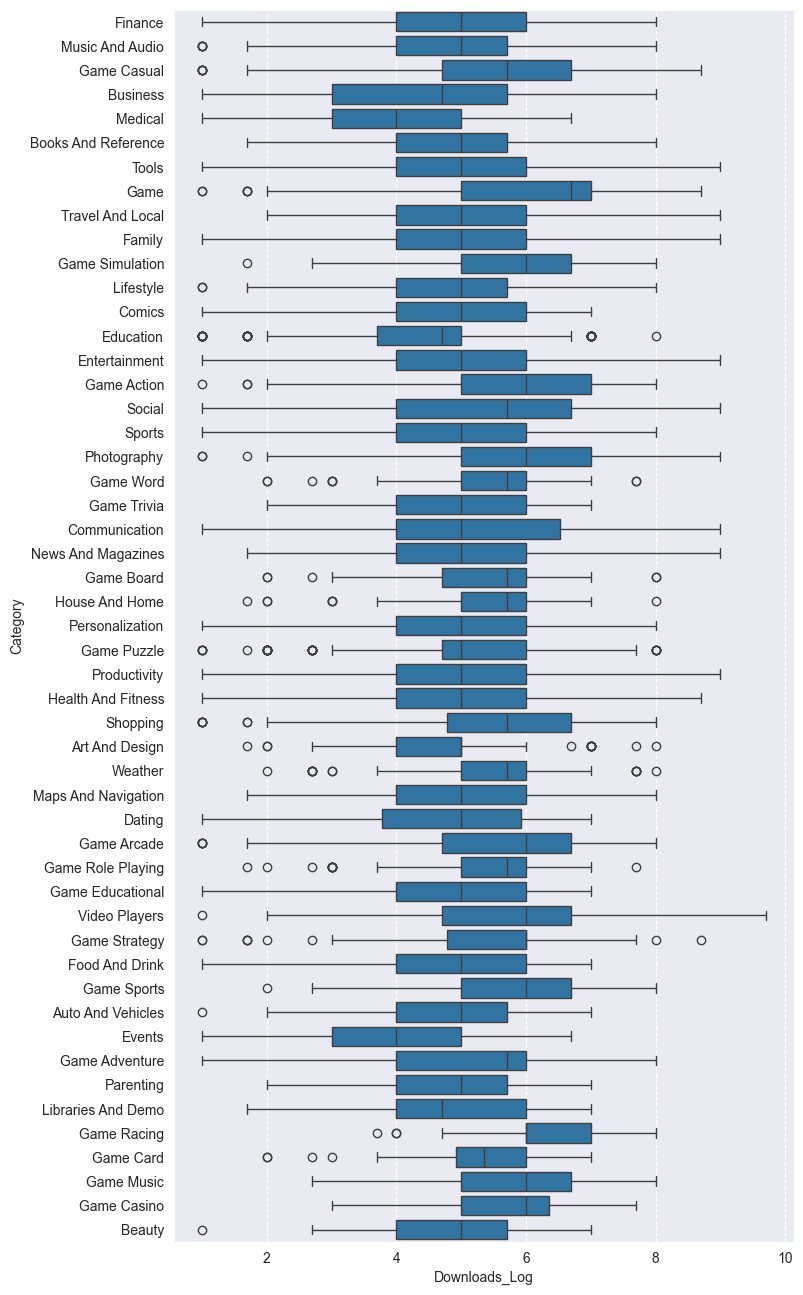

In [40]:
plt.figure(figsize=(8,16))
sns.boxplot(y=download_df_new[categorical_feature]['Category'],x=download_df_new[numerical_feature]['Downloads_Log'])
sns.set_style("darkgrid", {'grid.linestyle': '--'})
plt.show()

By observing the above box plot we are getting to know that we have potentila outliers at lowest percentile and which has to be adressed and this can be tackled using z score where in we will get the standard deviation values and we will consider only data which lies between -3 to 3 or -4 to 4 standard deviation.


Now using Z score formula we will remove some outliers from the dataset and again check the distribution of it.


In [41]:
download_df_new.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000,5.00000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000,3.69897
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000,4.00000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000,7.00000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000,3.69897


The formula for Z score is as follows:
z Score = (value of individual data point - mean)/standard deviation 

In [42]:
download_df_new['download_Z_Score'] = (download_df_new['Downloads'] - download_df_new['Downloads'].mean())/download_df_new['Downloads'].std()


In [43]:
download_df_new

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log,download_Z_Score
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000,5.00000,-0.106525
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000,3.69897,-0.107987
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000,4.00000,-0.107910
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000,7.00000,0.045906
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000,3.69897,-0.107987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000,6.00000,-0.092667
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000,4.00000,-0.107910
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000,5.69897,-0.100366
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000,8.00000,1.431644


In [44]:
download_df_new.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log,download_Z_Score
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000,5.00000,-0.106525
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000,3.69897,-0.107987
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000,4.00000,-0.107910
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000,7.00000,0.045906
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000,3.69897,-0.107987


In [45]:
download_df_new.tail()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log,download_Z_Score
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000,6.00000,-0.092667
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000,4.00000,-0.107910
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000,5.69897,-0.100366
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000,8.00000,1.431644
16515,psid4549,Game Role Playing,4.45,21201,16M,745.0542,Teen,Sep 20 2019,2.5.17.0,3.0 and up,100000,5.00000,-0.106525


In [46]:
download_df_new.shape

(16428, 13)

In [47]:
download_df_update = download_df_new.loc[(download_df_new['download_Z_Score']>=-4) & (download_df_new['download_Z_Score']<=4)]

In [48]:
download_df_update

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log,download_Z_Score
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000,5.00000,-0.106525
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000,3.69897,-0.107987
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000,4.00000,-0.107910
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000,7.00000,0.045906
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000,3.69897,-0.107987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000,6.00000,-0.092667
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000,4.00000,-0.107910
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000,5.69897,-0.100366
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000,8.00000,1.431644


In [49]:
download_df_update.shape

(16356, 13)

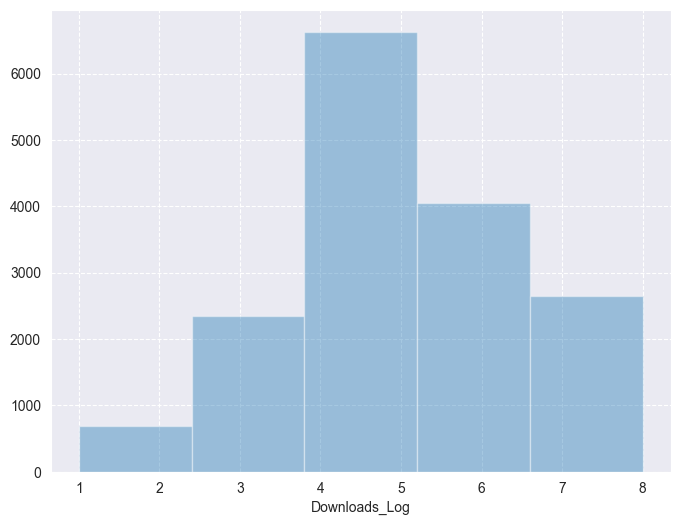

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(download_df_update[numerical_feature]['Downloads_Log'], kde=False, bins=5)
plt.show()

In [51]:
download_df_update.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,Downloads_Log,download_Z_Score
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000,5.00000,-0.106525
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000,3.69897,-0.107987
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000,4.00000,-0.107910
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000,7.00000,0.045906
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000,3.69897,-0.107987


In [52]:
download_df_update = download_df_update.drop(['Downloads_Log','download_Z_Score'],axis=1)
download_df_update

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000
...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000


In [53]:
download_df_update.to_csv('downloads_new.csv',index=False)

In [54]:
download_df_update.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000


In [55]:
download_df_update = download_df_update.rename(columns={
    'Offered_By' : 'playstore app ID'
})
download_df_update

,playstore app ID,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000
...,...,...,...,...,...,...,...,...,...,...,...
16511,psid5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000
16512,psid15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000
16513,psid36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000
16514,psid12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000


In [56]:
download_df_update.head()

,playstore app ID,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,psid24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,psid35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,psid11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,psid36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,psid35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000


In [57]:
download_df_update = download_df_update.replace({
    'playstore app ID' : '[psid]'
},"",regex=True)
download_df_update.head()

,playstore app ID,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000


In [58]:
download_df_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16356 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   playstore app ID     16356 non-null  object 
 1   Category             16356 non-null  object 
 2   Rating               16356 non-null  float64
 3   Reviews              16356 non-null  int64  
 4   Size                 16356 non-null  object 
 5   Price                16356 non-null  float64
 6   Content_Rating       16356 non-null  object 
 7   Last_Updated_On      16356 non-null  object 
 8   Release_Version      16356 non-null  object 
 9   OS_Version_Required  16356 non-null  object 
 10  Downloads            16356 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


In [59]:
download_df_update['playstore app ID'] = pd.to_numeric(download_df_update['playstore app ID'], errors='coerce')
download_df_update.head()

,playstore app ID,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000


In [60]:
download_df_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16356 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   playstore app ID     16356 non-null  int64  
 1   Category             16356 non-null  object 
 2   Rating               16356 non-null  float64
 3   Reviews              16356 non-null  int64  
 4   Size                 16356 non-null  object 
 5   Price                16356 non-null  float64
 6   Content_Rating       16356 non-null  object 
 7   Last_Updated_On      16356 non-null  object 
 8   Release_Version      16356 non-null  object 
 9   OS_Version_Required  16356 non-null  object 
 10  Downloads            16356 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


In [61]:
download_df_update.to_csv('downloads_new.csv',index=False)

In [63]:
download_df_update

,playstore app ID,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000
...,...,...,...,...,...,...,...,...,...,...,...
16511,5583,Health And Fitness,4.30,13724,Varies with device,0.0000,Everyone,Sep 21 2018,Varies with device,Varies with device,1000000
16512,15485,Beauty,4.73,70,7.9M,0.0000,Everyone,May 07 2020,0.2.5,4.1 and up,10000
16513,36065,Health And Fitness,4.60,5420,21M,0.0000,Everyone,Jul 10 2019,2.48.3,4.1 and up,500000
16514,12625,Productivity,4.60,1488289,Varies with device,0.0000,Everyone,Sep 07 2019,Varies with device,Varies with device,100000000


In [86]:
numerical_feature = [feature for feature in download_df_update.columns if download_df_update[feature].dtype !='O']
categorical_feature = [feature for feature in download_df_update.columns if download_df_update[feature].dtype =='O']

print('we have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical features: {}'.format(len(categorical_feature),categorical_feature))

we have 5 numerical features: ['playstore app ID', 'Rating', 'Reviews', 'Price', 'Downloads']
we have 3 categorical features: ['Category', 'Content_Rating', 'OS_Version_Required']


In [87]:
print(download_df_update[categorical_feature]['OS_Version_Required'].value_counts())

OS_Version_Required
4.1 and up            4338
4.0.3 and up          2543
4.0 and up            1878
4.4 and up            1809
Varies with device    1375
5.0 and up            1274
2.3 and up             751
4.2 and up             689
4.3 and up             347
2.3.3 and up           288
2.2 and up             250
3.0 and up             235
6.0 and up             140
2.1 and up             116
5.1 and up              64
1.6 and up              62
7.0 and up              48
1.5 and up              36
3.2 and up              29
2.0 and up              29
4.4w and up             15
3.1 and up              12
8.0 and up              12
2.0.1 and up             9
7.1 and up               5
1.1 and up               1
1.0 and up               1
Name: count, dtype: int64


In [73]:
download_df_update.head()

,playstore app ID,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,100000
1,35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,5000
2,11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,10000
3,36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,10000000
4,35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5000


In [82]:
download_df_update = download_df_update.drop(columns=['Size'],axis=1)
download_df_update

,playstore app ID,Category,Rating,Reviews,Price,Content_Rating,OS_Version_Required,Downloads
0,24654,Finance,4.18,1481,0.0000,Everyone,Varies with device,100000
1,35329,Music And Audio,4.81,302,0.0000,Everyone,4.1 and up,5000
2,11044,Game Casual,4.27,374,0.0000,Everyone,4.1 and up,10000
3,36068,Business,4.03,122058,0.0000,Teen,Varies with device,10000000
4,35831,Medical,4.60,358,297.5742,Everyone,Varies with device,5000
...,...,...,...,...,...,...,...,...
16511,5583,Health And Fitness,4.30,13724,0.0000,Everyone,Varies with device,1000000
16512,15485,Beauty,4.73,70,0.0000,Everyone,4.1 and up,10000
16513,36065,Health And Fitness,4.60,5420,0.0000,Everyone,4.1 and up,500000
16514,12625,Productivity,4.60,1488289,0.0000,Everyone,Varies with device,100000000


In [83]:
download_df_update.to_csv('downloads_new.csv',index=False)

In [84]:
download_df_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16356 entries, 0 to 16515
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   playstore app ID     16356 non-null  int64  
 1   Category             16356 non-null  object 
 2   Rating               16356 non-null  float64
 3   Reviews              16356 non-null  int64  
 4   Price                16356 non-null  float64
 5   Content_Rating       16356 non-null  object 
 6   OS_Version_Required  16356 non-null  object 
 7   Downloads            16356 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
